# Sentiment Analysis of Twitter replies

All comments are described with a hashtag so that the computer does not read them in the form of code.

The first step is to open the file, or the so-called data set. On different devices, it will be located in different places.

In [1]:
# Change directory path
%cd /content/drive/MyDrive/sentiment_analysis

/content/drive/MyDrive/sentiment_analysis


The next step is to import all the necessary libraries to provide the necessary tools for the analysis.

In [2]:
# import libraries

import pandas as pd
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import itertools

import nltk
%matplotlib inline
import numpy as np
import unicodedata
from nltk.corpus import stopwords
import seaborn as sns
import string
import re
import os
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import RegexpTokenizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from operator import add

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


One of the most important libraries for the sentiment analysis is NLTK, for which additional packages need to be downloaded. More about NLTK and how it works is described in the theoretical part of this study.

In [3]:
# Downloading NLTK pakages
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
# Reading 2nd sheet for data
df = pd.read_excel('Content_Analysis.xlsx',sheet_name='Sheet2')
df=df[['COUTRY','CLUB','COMMENT 1','COMMENT 2','COMMENT 3','COMMENT 4','COMMENT 5','COMMENT 6','COMMENT 7','COMMENT 8',
   'COMMENT 9','COMMENT 10']]
df

COUTRY  ...                                         COMMENT 10
0         1  ...               From and can't find Accra on the map
1         1  ...  Pep has been the greatest manager ever this wh...
2         1  ...  Manchester City fans yesterday: "We're signing...
3         1  ...              Very Unfortunate Now Announce Ronaldo
4         1  ...                    De Bruyne didn't renew for this
..      ...  ...                                                ...
752       4  ...                                         Small club
753       4  ...                                        Força Barca
754       4  ...               #KoemanOut #Barca_needs_new_defenses
755       4  ...                                             Class 
756       4  ...        That's why sevilla is bigger than Barceshit

[757 rows x 12 columns]

In [5]:
# Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COUTRY      757 non-null    int64 
 1   CLUB        757 non-null    int64 
 2   COMMENT 1   757 non-null    object
 3   COMMENT 2   757 non-null    object
 4   COMMENT 3   757 non-null    object
 5   COMMENT 4   757 non-null    object
 6   COMMENT 5   757 non-null    object
 7   COMMENT 6   757 non-null    object
 8   COMMENT 7   757 non-null    object
 9   COMMENT 8   757 non-null    object
 10  COMMENT 9   757 non-null    object
 11  COMMENT 10  757 non-null    object
dtypes: int64(2), object(10)
memory usage: 71.1+ KB


In [6]:
# Check how much values are null in data
df.isnull().sum()

COUTRY        0
CLUB          0
COMMENT 1     0
COMMENT 2     0
COMMENT 3     0
COMMENT 4     0
COMMENT 5     0
COMMENT 6     0
COMMENT 7     0
COMMENT 8     0
COMMENT 9     0
COMMENT 10    0
dtype: int64

In [7]:
# Descriptions of dataset values, counts, means, min, max
df.describe()

COUTRY        CLUB
count  757.000000  757.000000
mean     1.830911    5.575958
std      1.157193    4.548516
min      1.000000    1.000000
25%      1.000000    2.000000
50%      1.000000    4.000000
75%      3.000000    9.000000
max      4.000000   16.000000

The next step is to clean and prepare the data for analysis.

In [8]:
# Function to clean the dataset, by removing stopwords, repeating characters, emails, web urls, make words to thier origin words
STOPWORDS = set(stopwords.words('english'))
def Single_char_removing(text):
  return ' '.join( [w for w in text.split() if len(w)>1] )
def cleaning_stopwords(text):
    return " ".join([word.lower() for word in str(text).split() if word not in STOPWORDS])
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)
def cleaning_URLs(data):
    return re.sub(r'http\S+', '', data)
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
tokenizer = RegexpTokenizer(r'\w+')
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text
def preprocesses_data(data):
  data= data.apply(lambda x: cleaning_URLs(x))
  data= data.apply(lambda x: cleaning_email(x))
  data = data.apply(lambda text: cleaning_stopwords(text))
  data= data.apply(lambda x: cleaning_punctuations(x))
  data = data.apply(lambda x: cleaning_repeating_char(x))
  data = data.apply(lambda x: cleaning_numbers(x))
  data = data.apply(tokenizer.tokenize)
  # # data= data.apply(lambda x: stemming_on_text(x))
  data = data.apply(lambda x: lemmatizer_on_text(x))
  data = data.apply(lambda x: ' '.join(x))
  data = data.apply(lambda x: Single_char_removing(x))

  return data

In [9]:
# Cleaning all dataset using cleaning function that are describe earlier to clean whole dataset at once
processed_data=df
for_process=['COMMENT 1','COMMENT 2','COMMENT 3','COMMENT 4',
                     'COMMENT 5','COMMENT 6','COMMENT 7','COMMENT 8','COMMENT 9','COMMENT 10']
for column in for_process:
  processed_data[column]=preprocesses_data(processed_data[column])
processed_data

COUTRY  ...                                         COMMENT 10
0         1  ...                            from cant find acra map
1         1  ...  pep greatest manager ever whole season til tod...
2         1  ...  manchester city fan yesterday were signing cr ...
3         1  ...               very unfortunate now anounce ronaldo
4         1  ...                                    de bruyne renew
..      ...  ...                                                ...
752       4  ...                                          smal club
753       4  ...                                        força barca
754       4  ...                     koemanout barcanedsnewdefenses
755       4  ...                                               clas
756       4  ...                       thats sevila biger barceshit

[757 rows x 12 columns]

In [10]:
processed_data.to_excel('processed_data.xlsx',index=False)

Once the data is prepared for analysis, the real part begins, which is done with the help of the built-in function in the NLTK package - Sentiment Intensity Analyzer, part of the Valence Aware Dictionary and sEntiment Reasoner (VADER).

In [11]:
# Function to adding columns
def inset_col(df, index,name,value):
  if not name in df.columns:
    df.insert(index,name,value)

In [12]:
# Sentiment Intensity Analyzer using NLTK for each column
sid = SentimentIntensityAnalyzer()
for_process=['COMMENT 1','COMMENT 2','COMMENT 3','COMMENT 4',
                     'COMMENT 5','COMMENT 6','COMMENT 7','COMMENT 8','COMMENT 9','COMMENT 10']
all_dict_prob={}
for col in for_process:
  dict_data=processed_data[col].apply(lambda x: sid.polarity_scores(x))
  label=[]
  all_probs=[]
  for index in range(len(processed_data[col])):
    dict_d=dict_data[index]
    names=list(dict_d.keys())
    values=list(dict_d.values())
    types=names[np.argmax(values)]
    types=types+', '+str(values[np.argmax(values)])
    label.append(types)
    all_probs.append(values)
  all_dict_prob[col]=all_probs
  index_no = processed_data.columns.get_loc(col)
  inset_col(processed_data, index_no+1,col+' label',label)

In [13]:
# Probability percentage for each row data into last column
names=['neg', 'neu', 'pos', 'compound']
allprobs=[]
for index in range(len(all_dict_prob['COMMENT 1'])):
  row_prob=[0,0,0,0]
  for key in all_dict_prob:
    row_prob=list( map(add, row_prob, all_dict_prob[key][index]))
  newList = [x / 10 for x in row_prob]
  hig_ind=np.argmax(newList)
  prob=names[hig_ind]+', '+str(np.round(newList[hig_ind],2))
  allprobs.append(prob)
processed_data['Comments_probabilities']=allprobs

In [14]:
processed_data

COUTRY  CLUB  ... COMMENT 10 label Comments_probabilities
0         1     1  ...         neu, 1.0              neu, 0.86
1         1     1  ...        neu, 0.84              neu, 0.74
2         1     1  ...       neu, 0.813              neu, 0.87
3         1     1  ...       neu, 0.548               neu, 0.7
4         1     1  ...         neu, 1.0              neu, 0.55
..      ...   ...  ...              ...                    ...
752       4    15  ...         neu, 1.0              neu, 0.59
753       4    15  ...         neu, 1.0              neu, 0.88
754       4    15  ...         neu, 1.0              neu, 0.87
755       4    16  ...         neu, 1.0              neu, 0.76
756       4    16  ...         neu, 1.0              neu, 0.54

[757 rows x 23 columns]

After conducting the analysis, it is checked with what probability the given comment is negative, positive or neutral. This process is repeated for the entire dataset, for each country and for each team. In the end, both nominal and percentage values are obtained.

In [15]:
# Probobality of sentiment on comments in dataframe provided
def prob_counts(df):
  neg=0
  pos=0
  neu=0
  comp=0
  total=0

  neg_t=0
  pos_t=0
  comp_t=0
  neu_t=0

  for col in df:
    if 'label' in col:
      for value in df[col]:
        total=total+1
        if 'neu' in value:
          neu_t=neu_t+1
          prob=value.split()[1]
          neu=neu+float(prob)

        if 'pos' in value:
          pos_t=pos_t+1
          prob=value.split()[1]
          pos=pos+float(prob)

        if 'neg' in value:
          neg_t=neg_t+1
          prob=value.split()[1]
          neg=neg+float(prob)

        if 'comp' in value:
          comp_t=comp_t+1
          prob=value.split()[1]
          comp=comp+float(prob ) 

          
  print('Counts: Negitive: ',neg_t,'Positive:', pos_t,
        'Neutral: ',neu_t ,'Compound: ',comp_t)  
  print('Probabilities: Negitive: ',np.round(neg_t/total,2),'Positive:', np.round(pos_t/total,2),
        'Neutral: ',np.round(neu_t/total,2),'Compound: ',np.round(comp_t/total,2))  

In [16]:
print('Whole Dataset')
prob_counts(processed_data)

Whole Dataset
Counts: Negitive:  454 Positive: 979 Neutral:  5324 Compound:  813
Probabilities: Negitive:  0.06 Positive: 0.13 Neutral:  0.7 Compound:  0.11


In [17]:
# COUNTRY
groupped=processed_data.groupby('COUTRY')
# bas_path='COUTRY'
for num in processed_data['COUTRY'].unique():
  group_path='COUTRY_'+str(num)
  print('\n'+group_path+' processing')
  grouped_data=groupped.get_group(num)
  prob_counts(grouped_data)


COUTRY_1 processing
Counts: Negitive:  273 Positive: 535 Neutral:  3247 Compound:  525
Probabilities: Negitive:  0.06 Positive: 0.12 Neutral:  0.71 Compound:  0.11

COUTRY_2 processing
Counts: Negitive:  65 Positive: 154 Neutral:  606 Compound:  95
Probabilities: Negitive:  0.07 Positive: 0.17 Neutral:  0.66 Compound:  0.1

COUTRY_3 processing
Counts: Negitive:  31 Positive: 120 Neutral:  593 Compound:  96
Probabilities: Negitive:  0.04 Positive: 0.14 Neutral:  0.71 Compound:  0.11

COUTRY_4 processing
Counts: Negitive:  85 Positive: 170 Neutral:  878 Compound:  97
Probabilities: Negitive:  0.07 Positive: 0.14 Neutral:  0.71 Compound:  0.08


In [18]:
# CLUB 
groupped=processed_data.groupby('CLUB')
# bas_path='COUTRY'
for num in processed_data['CLUB'].unique():
  group_path='CLUB_'+str(num)
  print('\n'+group_path+' processing')
  grouped_data=groupped.get_group(num)
  prob_counts(grouped_data)


CLUB_1 processing
Counts: Negitive:  55 Positive: 131 Neutral:  717 Compound:  117
Probabilities: Negitive:  0.05 Positive: 0.13 Neutral:  0.7 Compound:  0.11

CLUB_2 processing
Counts: Negitive:  96 Positive: 124 Neutral:  862 Compound:  158
Probabilities: Negitive:  0.08 Positive: 0.1 Neutral:  0.7 Compound:  0.13

CLUB_3 processing
Counts: Negitive:  72 Positive: 183 Neutral:  1079 Compound:  166
Probabilities: Negitive:  0.05 Positive: 0.12 Neutral:  0.72 Compound:  0.11

CLUB_4 processing
Counts: Negitive:  50 Positive: 97 Neutral:  589 Compound:  84
Probabilities: Negitive:  0.06 Positive: 0.12 Neutral:  0.72 Compound:  0.1

CLUB_5 processing
Counts: Negitive:  31 Positive: 40 Neutral:  243 Compound:  36
Probabilities: Negitive:  0.09 Positive: 0.11 Neutral:  0.69 Compound:  0.1

CLUB_6 processing
Counts: Negitive:  32 Positive: 102 Neutral:  331 Compound:  55
Probabilities: Negitive:  0.06 Positive: 0.2 Neutral:  0.64 Compound:  0.11

CLUB_7 processing
Counts: Negitive:  2 Posi

Finally, the most used words and there sentiment are visualized. Again for the whole data set, by country and by club.

In [19]:
# Probobality of sentiment on word in dataframe provided

def words_counts(df):


  cols =['COMMENT 1', 'COMMENT 2', 'COMMENT 3', 'COMMENT 4', 'COMMENT 5', 
        'COMMENT 6', 'COMMENT 7', 'COMMENT 8', 'COMMENT 9', 'COMMENT 10']
  all_comments=df[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
  all_comments=' '.join(all_comments)
  all_comments=unicodedata.normalize('NFKC',all_comments)
  # Generate a word cloud image
  plt.figure(figsize=(15,7))
  wordcloud = WordCloud().generate(all_comments)

  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()


  term_fd = nltk.FreqDist(tokenizer.tokenize(all_comments))
  neu=[]
  pos=[]
  neg=[]
  # comp=[]

  neu_count=[]
  pos_count=[]
  neg_count=[]
  # comp_count=[]
  for col in df:
    if not 'label' in col and  'COMMENT' in col :
      for comment in df[col]:
        tokens=tokenizer.tokenize(comment)
        for word in tokens:
          # print(word)
          dict_d=sid.polarity_scores(word)
          # print(dict_d)
          names=list(dict_d.keys())
          values=list(dict_d.values())
          types=names[np.argmax(values)]
          # print(np.argmax(values))
          if 'neu' in types:
            neu.append(word)
            neu_count.append(term_fd[word])
          
          if 'pos' in types:
            pos.append(word)
            pos_count.append(term_fd[word])

          if 'neg' in types:
            neg.append(word)
            neg_count.append(term_fd[word])

          # if 'comp' in types:
          #   comp.append(word)
          #   comp_count.append(term_fd[word])
  new_df=pd.DataFrame((_ for _ in itertools.zip_longest(*[pos,pos_count])), 
                      columns=['positive','positive count'])
  new_df=new_df.sort_values(by=['positive count'], ascending = False)
  new_df = new_df.drop_duplicates()
  new_df.reset_index(drop=True, inplace=True)

  new_df1=pd.DataFrame((_ for _ in itertools.zip_longest(*[neu,neu_count])), 
                      columns=['neutral','neutral count'])
  new_df1=new_df1.sort_values(by=['neutral count'], ascending = False)
  new_df1 = new_df1.drop_duplicates()
  new_df1.reset_index(drop=True, inplace=True)

  new_df2=pd.DataFrame((_ for _ in itertools.zip_longest(*[neg,neg_count])), 
                      columns=['negative','negative count'])
  new_df2=new_df2.sort_values(by=['negative count'], ascending = False)
  new_df2 = new_df2.drop_duplicates()
  new_df2.reset_index(drop=True, inplace=True)

  return pd.concat([new_df, new_df1, new_df2], axis=1)


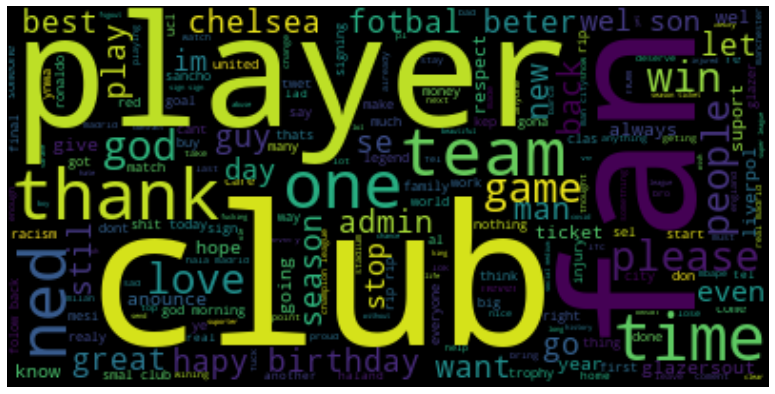

In [20]:
new_df=words_counts(processed_data)

In [21]:
print(new_df[['neutral','positive','negative']].count())
new_df.head(10)

neutral     6156
positive     375
negative     365
dtype: int64


positive  positive count neutral  neutral count negative  negative count
0      fan           387.0    club            636       no           178.0
1      god           315.0     get            411     stop           100.0
2     like           231.0      we            327   racism            87.0
3   please           231.0     you            303   injury            61.0
4      win           220.0      it            301     shit            50.0
5     love           201.0  player            288      sad            47.0
6     best           172.0     the            266      bad            44.0
7    thank           143.0    team            254    leave            43.0
8    great           132.0      he            247    abuse            41.0
9     want           127.0     wel            240     fuck            41.0

# Country

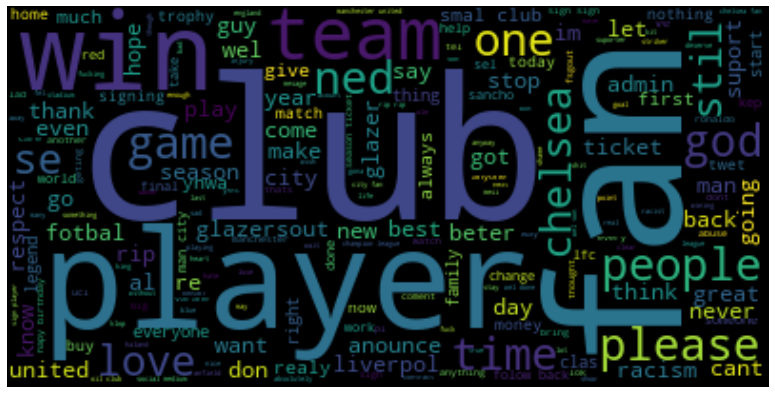

In [22]:
# COUNTRY 
groupped=processed_data.groupby('COUTRY')
new_df=words_counts(groupped.get_group(1))

In [23]:
print(new_df[['neutral','positive','negative']].count())
new_df.head(10)

neutral     4638
positive     339
negative     315
dtype: int64


positive  positive count  neutral  neutral count negative  negative count
0      fan           300.0     club            457       no           113.0
1     like           171.0      get            248     stop            82.0
2      win           160.0       we            233   racism            72.0
3      god           144.0       it            223    abuse            40.0
4   please           124.0      you            201      sad            35.0
5     love           116.0     sign            189     hate            31.0
6   united           105.0   player            185   injury            30.0
7    great            93.0  anounce            182     shit            29.0
8     want            91.0      the            175      bad            27.0
9     best            87.0     back            162     fuck            25.0

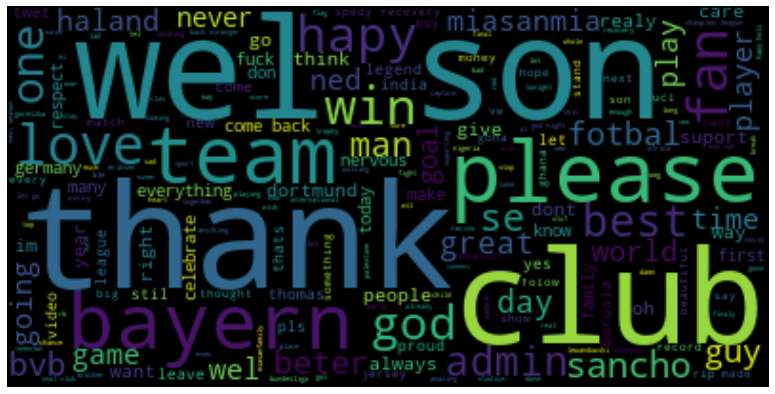

In [24]:
# COUNTRY
groupped=processed_data.groupby('COUTRY')
new_df=words_counts(groupped.get_group(2))

In [25]:
print(new_df[['neutral','positive','negative']].count())
new_df.head(10)

neutral     1355
positive     138
negative      80
dtype: int64


positive  positive count neutral  neutral count negative  negative count
0   please            36.0     get             62       no            16.0
1      god            33.0     wel             60  nervous            10.0
2    thank            31.0     son             53     fuck             9.0
3     love            31.0    club             47    leave             8.0
4      fan            30.0     you             38      mia             6.0
5      win            26.0    team             32   racism             5.0
6     best            21.0  bayern             31      bad             4.0
7   thanks            18.0    hapy             30   racist             4.0
8    great            15.0    this             29     stop             4.0
9     play            14.0     the             25     lose             4.0

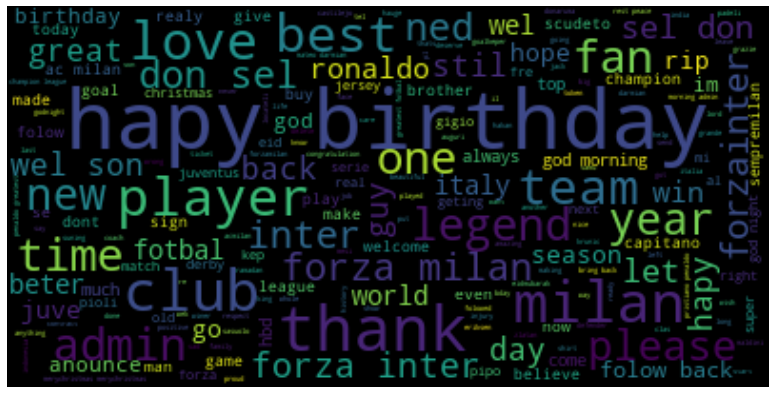

In [26]:
# COUNTRY 
groupped=processed_data.groupby('COUTRY')
new_df=words_counts(groupped.get_group(3))

In [27]:
print(new_df[['neutral','positive','negative']].count())
new_df.head(10)

neutral     1317
positive     126
negative      71
dtype: int64


positive  positive count   neutral  neutral count negative  negative count
0     love            35.0      hapy            109       no            13.0
1    thank            34.0  birthday            105    leave             5.0
2     best            32.0     milan             65   injury             4.0
3      god            26.0      club             41    wrong             4.0
4      fan            24.0     forza             39      sad             4.0
5   please            20.0    player             36    shame             3.0
6   thanks            18.0       sel             34     stop             3.0
7     like            16.0       the             34   racism             3.0
8    great            14.0     inter             33     fuck             2.0
9      win            13.0     admin             31  beating             2.0

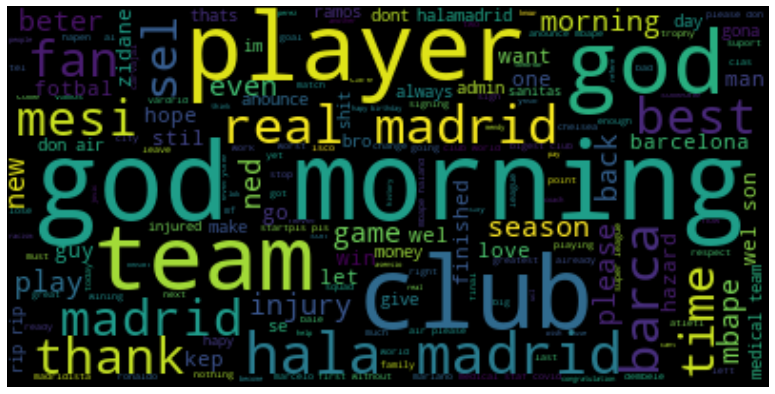

In [28]:
# COUNTRY 
groupped=processed_data.groupby('COUTRY')
new_df=words_counts(groupped.get_group(4))

#Club

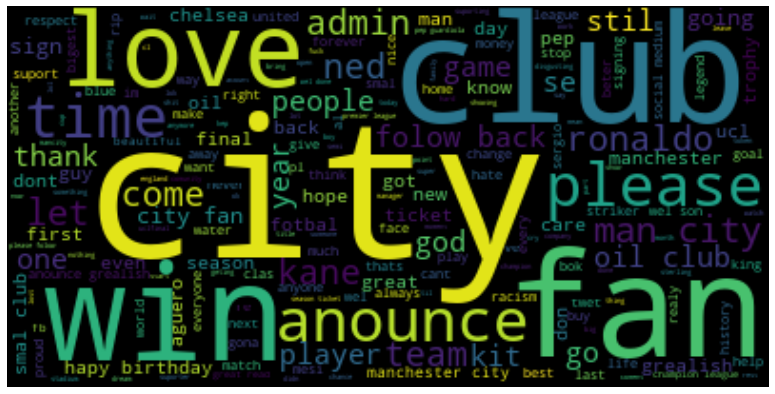

In [29]:
groupped=processed_data.groupby('CLUB')
new_df=words_counts(groupped.get_group(1))

In [30]:
print(new_df[['neutral','positive','negative']].count())
new_df.head(10)

neutral     1755
positive     157
negative     111
dtype: int64


positive  positive count  neutral  neutral count negative  negative count
0      fan            64.0     city            117       no            28.0
1      win            38.0     club             94     stop            13.0
2   please            36.0      get             49   racism            10.0
3     love            33.0       it             49     hate             9.0
4    great            26.0  anounce             44     shit             6.0
5      god            26.0     back             44     blah             6.0
6     like            26.0       we             43      cry             6.0
7     care            16.0      man             42     lost             6.0
8    thank            15.0      you             40     hard             6.0
9     hope            15.0      oil             38    abuse             5.0

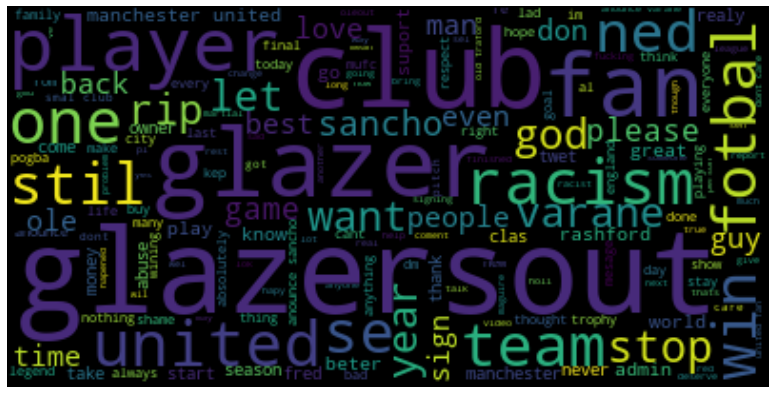

In [31]:
groupped=processed_data.groupby('CLUB')
new_df=words_counts(groupped.get_group(2))

In [32]:
print(new_df[['neutral','positive','negative']].count())
new_df.head(10)

neutral     2079
positive     187
negative     170
dtype: int64


positive  positive count     neutral  neutral count negative  negative count
0   united            77.0        club            131   racism            41.0
1      fan            76.0  glazersout            125       no            40.0
2     like            55.0      glazer             86     stop            33.0
3      win            43.0          we             73    abuse            20.0
4     want            30.0         the             66    shame            14.0
5     care            29.0      player             62      bad            13.0
6   please            29.0         get             62      sad            13.0
7     love            29.0          he             59   racist             9.0
8      god            29.0          it             58  problem             9.0
9     best            26.0         you             56    wrong             8.0

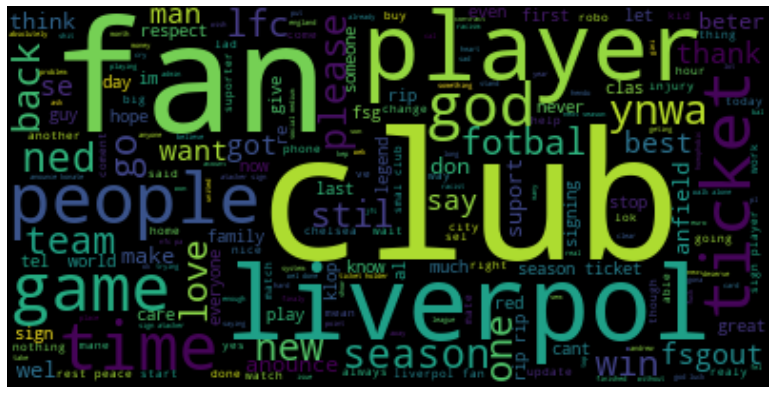

In [33]:
groupped=processed_data.groupby('CLUB')
new_df=words_counts(groupped.get_group(3))

In [34]:
print(new_df[['neutral','positive','negative']].count())
new_df.head(10)

neutral     2397
positive     227
negative     176
dtype: int64


positive  positive count   neutral  neutral count negative  negative count
0      fan            98.0      club            133       no            27.0
1     like            70.0       get             91      nfc            21.0
2      god            64.0  liverpol             90     stop            20.0
3      win            43.0        it             89   injury            17.0
4   please            41.0    ticket             88    alone            14.0
5     love            35.0    player             78     shit            11.0
6    great            32.0    season             77   racism            11.0
7     want            31.0       you             75   racist            10.0
8     best            31.0       rip             70     fuck            10.0
9    thank            25.0      sign             69  problem            10.0

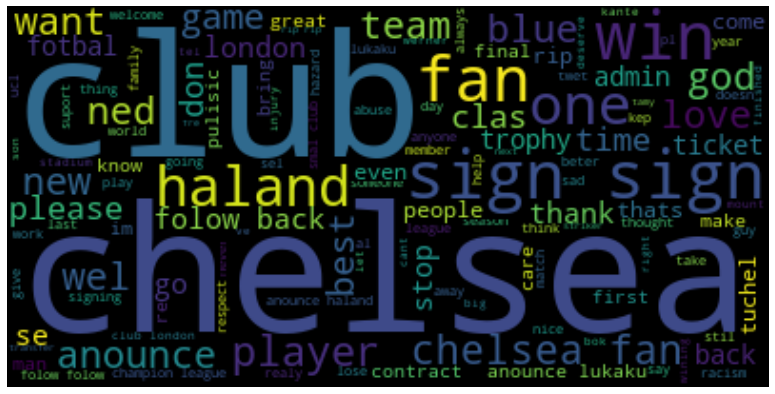

In [35]:
groupped=processed_data.groupby('CLUB')
new_df=words_counts(groupped.get_group(4))

In [36]:
print(new_df[['neutral','positive','negative']].count())
new_df.head(10)

neutral     1409
positive     147
negative     102
dtype: int64


positive  positive count  neutral  neutral count negative  negative count
0       fan            62.0     club             99       no            18.0
1       win            36.0  chelsea             95     stop            16.0
2       god            25.0     sign             68   racism            10.0
3      want            22.0       we             54    abuse            10.0
4      like            20.0  anounce             48      sad            10.0
5      love            19.0      get             46   injury             7.0
6      best            18.0    folow             41     lose             7.0
7    please            18.0     back             38     hate             6.0
8      care            15.0   haland             36     shit             6.0
9  champion            12.0      rip             30     fuck             5.0

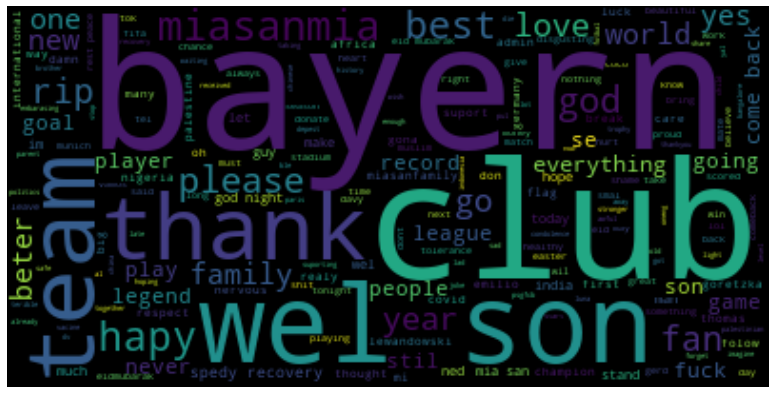

In [37]:
groupped=processed_data.groupby('CLUB')
new_df=words_counts(groupped.get_group(5))

In [38]:
print(new_df[['neutral','positive','negative']].count())
new_df.head(10)

neutral     752
positive     82
negative     46
dtype: int64


positive  positive count  ...    negative  negative count
0      god            16.0  ...          no             8.0
1     best            12.0  ...         mia             6.0
2    thank            11.0  ...        fuck             6.0
3   please            11.0  ...     nervous             4.0
4      fan            10.0  ...        damn             4.0
5     love             9.0  ...        shit             3.0
6      yes             7.0  ...        hurt             3.0
7     play             6.0  ...       leave             3.0
8     hope             5.0  ...  disgusting             3.0
9     like             5.0  ...       shame             3.0

[10 rows x 6 columns]

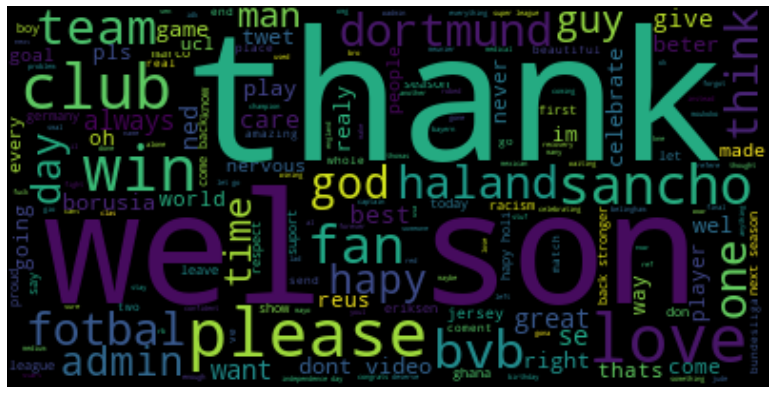

In [39]:
groupped=processed_data.groupby('CLUB')
new_df=words_counts(groupped.get_group(6))

In [40]:
print(new_df[['neutral','positive','negative']].count())
new_df.head(10)

neutral     830
positive    102
negative     53
dtype: int64


positive  positive count neutral  neutral count negative  negative count
0   please            21.0     get             36       no             8.0
1     love            21.0     wel             31  nervous             6.0
2      win            19.0     you             25   racism             5.0
3    thank            18.0     son             24    leave             5.0
4      fan            17.0    club             19    robed             3.0
5   thanks            14.0  sancho             18  problem             3.0
6      god            12.0    hapy             17     lose             3.0
7     want            10.0     day             16      idk             3.0
8    great            10.0     bvb             16    alone             3.0
9     care             9.0    team             15    fight             3.0

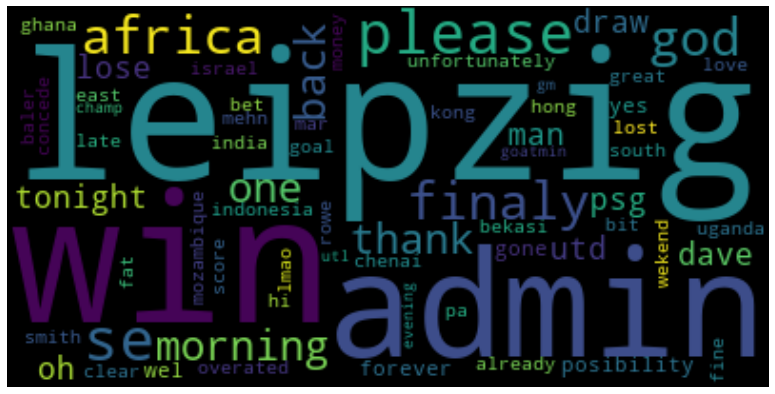

In [41]:
groupped=processed_data.groupby('CLUB')
new_df=words_counts(groupped.get_group(7))

In [42]:
print(new_df[['neutral','positive','negative']].count())
new_df.head(10)

neutral     62
positive    11
negative     3
dtype: int64


positive  positive count  ...       negative  negative count
0      win             4.0  ...  unfortunately             1.0
1      god             3.0  ...           lost             1.0
2   please             3.0  ...           lose             1.0
3    thank             2.0  ...            NaN             NaN
4    clear             1.0  ...            NaN             NaN
5    champ             1.0  ...            NaN             NaN
6      yes             1.0  ...            NaN             NaN
7     fine             1.0  ...            NaN             NaN
8     lmao             1.0  ...            NaN             NaN
9    great             1.0  ...            NaN             NaN

[10 rows x 6 columns]

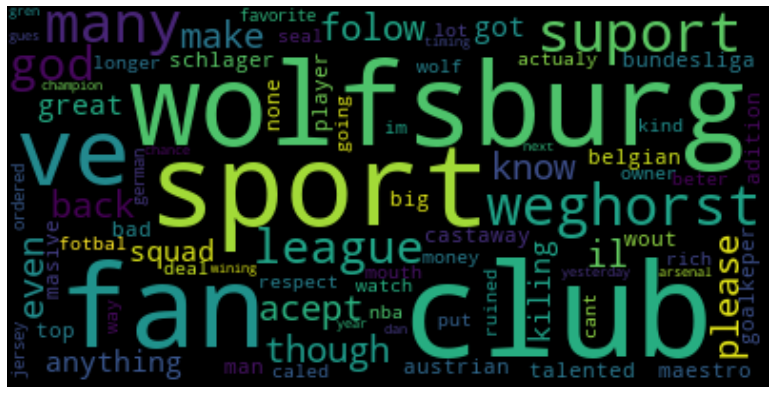

In [43]:
groupped=processed_data.groupby('CLUB')
new_df=words_counts(groupped.get_group(8))

In [44]:
print(new_df[['neutral','positive','negative']].count())
new_df.head(10)

neutral     73
positive    12
negative     2
dtype: int64


positive  positive count    neutral  neutral count negative  negative count
0       fan             3.0       club              4      bad             1.0
1       god             2.0       that              3   ruined             1.0
2    please             1.0      sport              3      NaN             NaN
3     great             1.0  wolfsburg              3      NaN             NaN
4       top             1.0   weghorst              2      NaN             NaN
5  talented             1.0     league              2      NaN             NaN
6   respect             1.0       many              2      NaN             NaN
7      kind             1.0     suport              2      NaN             NaN
8      rich             1.0         ve              2      NaN             NaN
9  favorite             1.0      caled              1      NaN             NaN

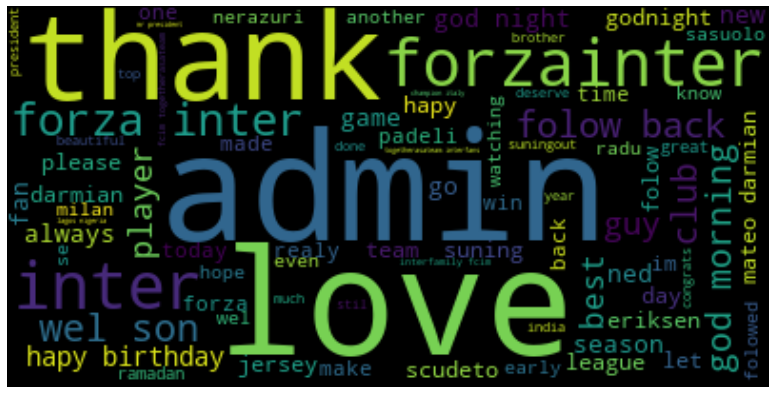

In [45]:
groupped=processed_data.groupby('CLUB')
new_df=words_counts(groupped.get_group(9))

In [46]:
print(new_df[['neutral','positive','negative']].count())
new_df.head(10)

neutral     457
positive     64
negative     13
dtype: int64


positive  positive count  ...   negative  negative count
0      love            27.0  ...    ashamed             2.0
1     thank            18.0  ...   disgrace             2.0
2       god            17.0  ...        pay             1.0
3      best             7.0  ...        idk             1.0
4       fan             6.0  ...     losing             1.0
5    please             5.0  ...    mistake             1.0
6  champion             5.0  ...  seriously             1.0
7    thanks             5.0  ...      leave             1.0
8       win             4.0  ...    beating             1.0
9      like             4.0  ...       fuck             1.0

[10 rows x 6 columns]

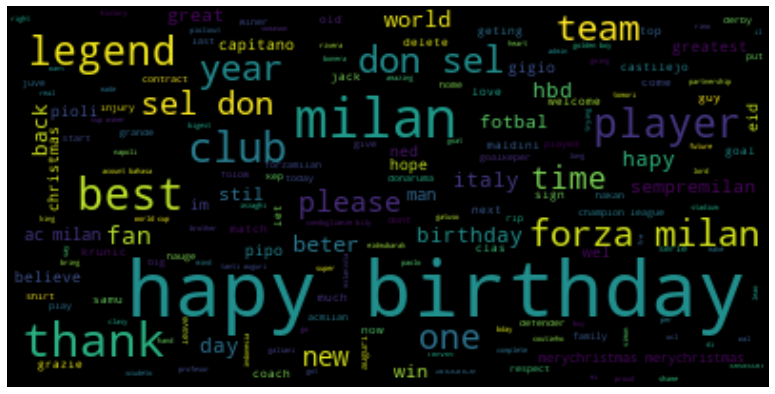

In [47]:
groupped=processed_data.groupby('CLUB')
new_df=words_counts(groupped.get_group(10))

In [48]:
print(new_df[['neutral','positive','negative']].count())
new_df.head(10)

neutral     842
positive     84
negative     40
dtype: int64


positive  positive count   neutral  neutral count negative  negative count
0      best            23.0  birthday             97       no             7.0
1     thank            16.0      hapy             97    leave             4.0
2    please            13.0     milan             62   injury             4.0
3    thanks            12.0       sel             27    shame             3.0
4       fan            11.0       the             25    doubt             2.0
5      like             9.0       don             21     fire             2.0
6       win             8.0      club             21    wrong             2.0
7     great             8.0       him             20     dirt             1.0
8      hope             6.0    player             20     stop             1.0
9  champion             6.0    legend             20      sad             1.0

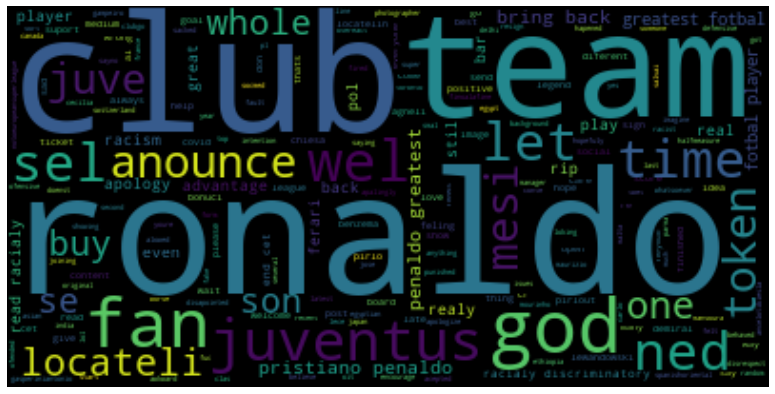

In [49]:
groupped=processed_data.groupby('CLUB')
new_df=words_counts(groupped.get_group(11))

In [50]:
print(new_df[['neutral','positive','negative']].count())
new_df.head(10)

neutral     381
positive     43
negative     31
dtype: int64


positive  positive count   neutral  neutral count  negative  negative count
0        god             7.0      club             10        no             5.0
1        fan             6.0   ronaldo             10    racism             3.0
2   greatest             4.0      team              8       sad             2.0
3       like             3.0       get              8     wrong             2.0
4       play             3.0    player              7   problem             1.0
5    apology             3.0      back              7     waste             1.0
6      great             3.0       the              7   exposed             1.0
7  advantage             3.0  juventus              6    racist             1.0
8    welcome             2.0   penaldo              6  fighting             1.0
9       hope             2.0       wel              6      suck             1.0

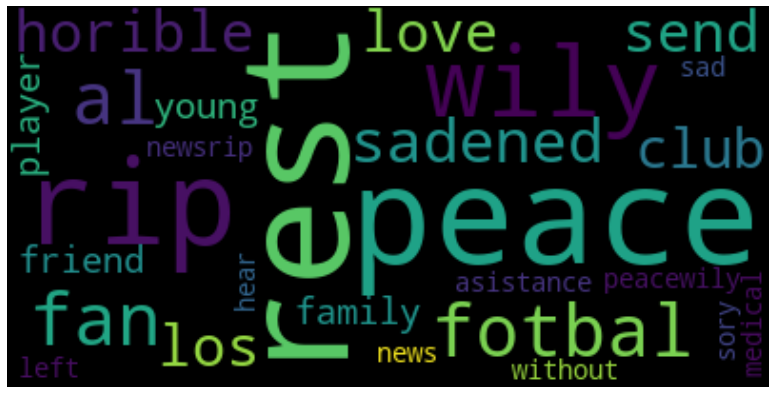

In [51]:
groupped=processed_data.groupby('CLUB')
new_df=words_counts(groupped.get_group(12))

In [52]:
print(new_df[['neutral','positive','negative']].count())
new_df.head(10)

neutral     27
positive     4
negative     1
dtype: int64


positive  positive count  neutral  neutral count negative  negative count
0    peace             4.0     rest              5      sad             1.0
1      fan             1.0      rip              3      NaN             NaN
2     love             1.0     wily              2      NaN             NaN
3   friend             1.0     send              1      NaN             NaN
4      NaN             NaN   fotbal              1      NaN             NaN
5      NaN             NaN  medical              1      NaN             NaN
6      NaN             NaN  without              1      NaN             NaN
7      NaN             NaN     left              1      NaN             NaN
8      NaN             NaN      you              1      NaN             NaN
9      NaN             NaN     news              1      NaN             NaN

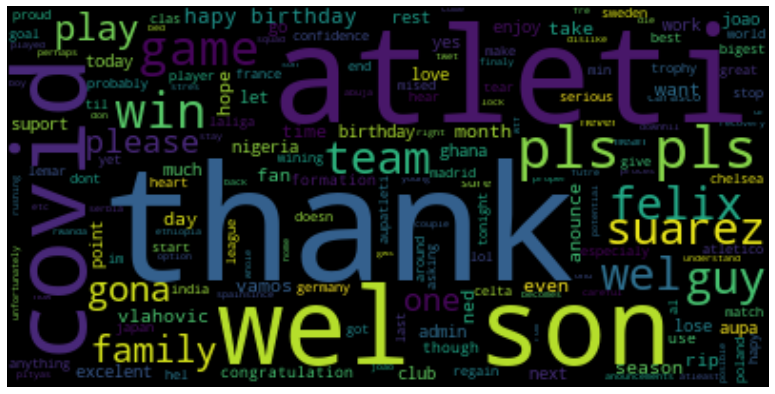

In [53]:
groupped=processed_data.groupby('CLUB')
new_df=words_counts(groupped.get_group(13))

In [54]:
print(new_df[['neutral','positive','negative']].count())
new_df.head(10)

neutral     393
positive     49
negative     29
dtype: int64


positive  positive count  ...       negative  negative count
0      pls            11.0  ...             no             5.0
1    thank             8.0  ...           lose             3.0
2      win             6.0  ...           stop             2.0
3     play             5.0  ...        serious             2.0
4   please             5.0  ...  unfortunately             1.0
5   thanks             5.0  ...      dangerous             1.0
6     hope             4.0  ...    frustration             1.0
7      fan             4.0  ...          alone             1.0
8     want             4.0  ...           shit             1.0
9      yes             3.0  ...           fuck             1.0

[10 rows x 6 columns]

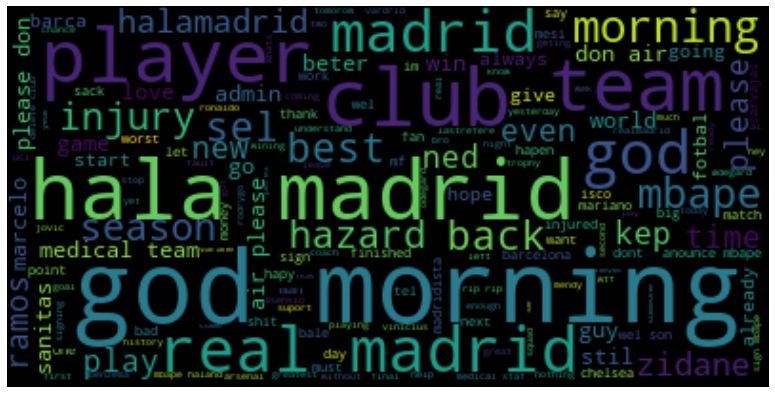

In [55]:
groupped=processed_data.groupby('CLUB')
new_df=words_counts(groupped.get_group(14))

In [56]:
print(new_df[['neutral','positive','negative']].count())
new_df.head(10)

neutral     1184
positive     103
negative      95
dtype: int64


positive  positive count  neutral  neutral count negative  negative count
0       god           101.0   madrid            110   injury            20.0
1    please            43.0  morning             97       no            15.0
2      best            21.0     club             52     shit            10.0
3      play            16.0     team             50  injured             9.0
4      like            13.0    mbape             49    worst             9.0
5       win            13.0     hala             43      bad             9.0
6      love            13.0     real             41    leave             6.0
7      hope            11.0   player             37    fault             6.0
8  champion             9.0      get             36      pay             5.0
9      want             9.0       he             28     stop             5.0

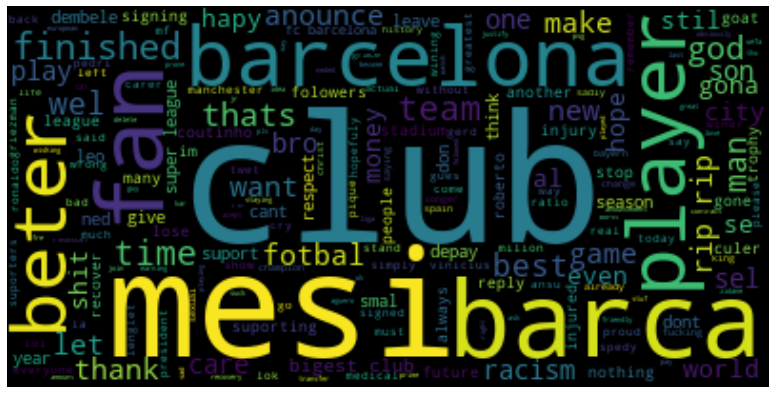

In [57]:
groupped=processed_data.groupby('CLUB')
new_df=words_counts(groupped.get_group(15))

In [58]:
print(new_df[['neutral','positive','negative']].count())
new_df.head(10)

neutral     718
positive     79
negative     53
dtype: int64


positive  positive count    neutral  neutral count negative  negative count
0      fan            20.0       club             36       no            16.0
1     like            14.0         he             26   racism             7.0
2      god            10.0       mesi             25     shit             6.0
3     best             9.0      barca             25    leave             5.0
4     want             8.0        get             19  injured             4.0
5     play             7.0  barcelona             19     stop             4.0
6     care             7.0         we             14     lose             4.0
7     hope             6.0        rip             14   injury             4.0
8    thank             5.0     player             14    wrong             3.0
9    super             5.0      beter             13      cry             3.0

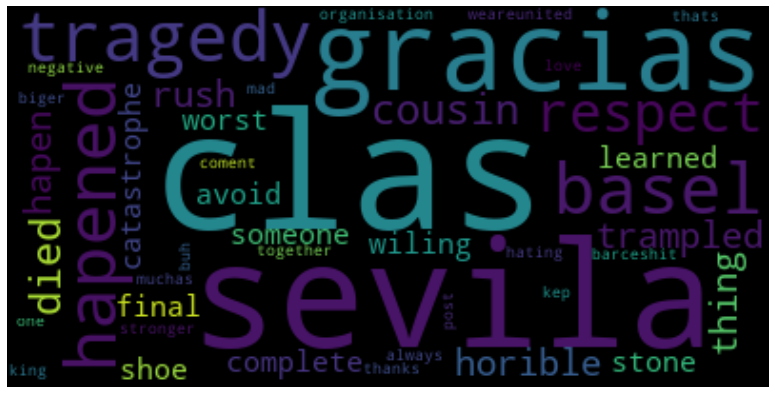

In [59]:
groupped=processed_data.groupby('CLUB')
new_df=words_counts(groupped.get_group(16))

In [60]:
print(new_df[['neutral','positive','negative']].count())
new_df.head(10)

neutral     39
positive     5
negative     8
dtype: int64


positive  positive count  ...     negative  negative count
0   respect             2.0  ...      tragedy             2.0
1  stronger             1.0  ...         died             1.0
2      like             1.0  ...  catastrophe             1.0
3    thanks             1.0  ...        avoid             1.0
4      love             1.0  ...        worst             1.0
5       NaN             NaN  ...     negative             1.0
6       NaN             NaN  ...          mad             1.0
7       NaN             NaN  ...       hating             1.0
8       NaN             NaN  ...          NaN             NaN
9       NaN             NaN  ...          NaN             NaN

[10 rows x 6 columns]